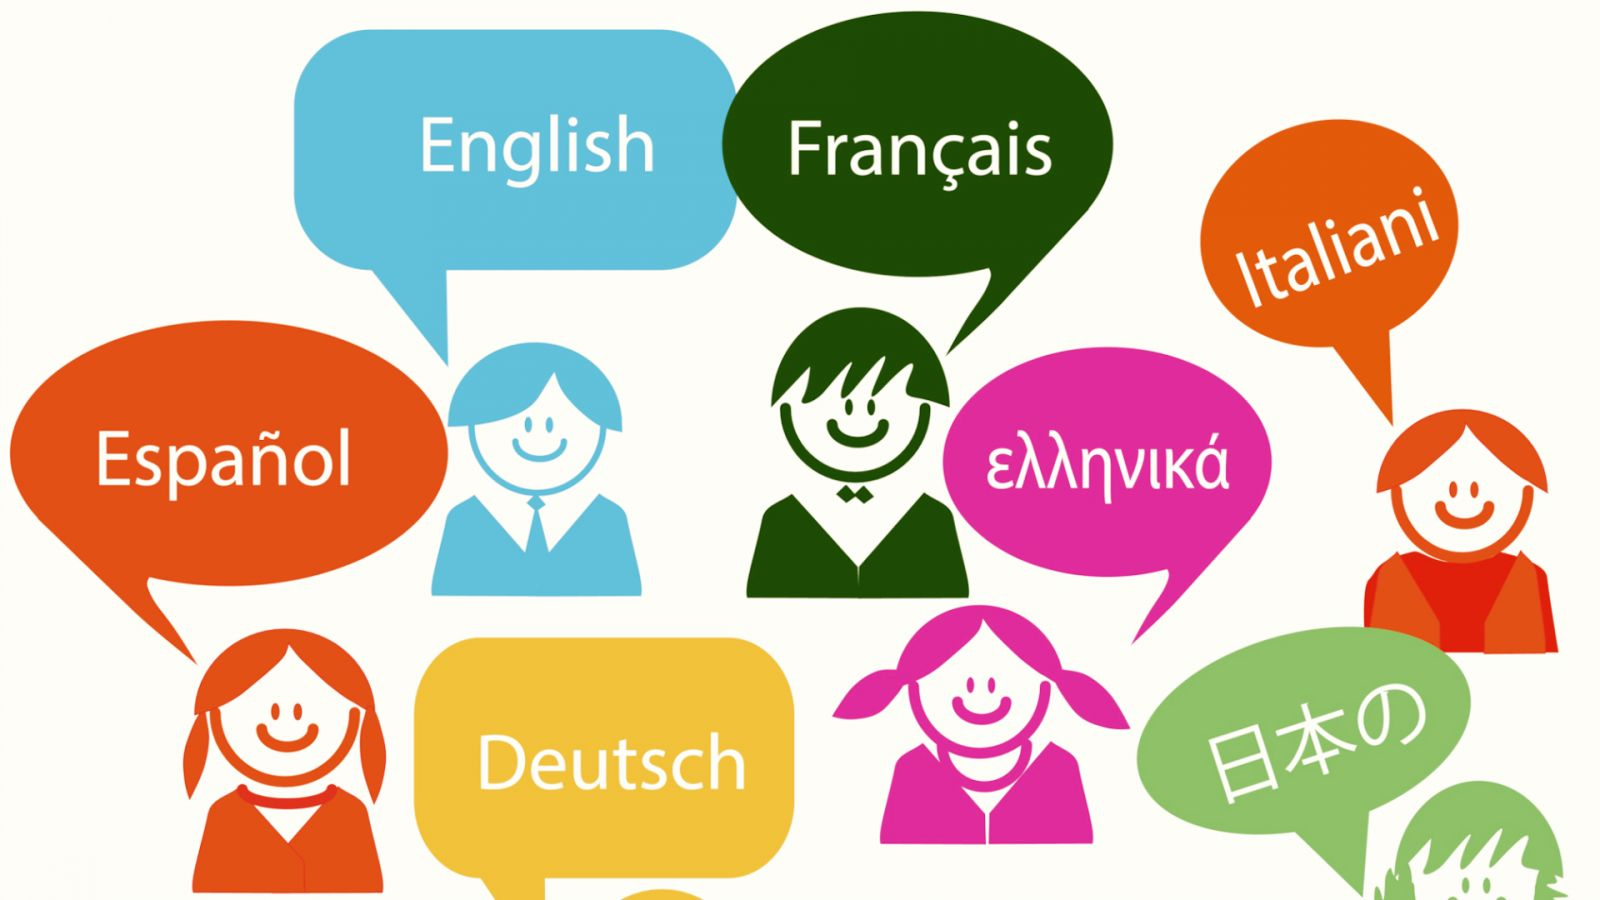

In [7]:
from IPython import display
display.Image("multi_idioma.jpeg")

In [6]:
#Importando Bibliotecas
import speech_recognition as sr
import pandas as pd
from IPython.display import display_markdown, display, HTML as html_print
from googletrans import Translator 
import pyttsx3
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector
from nltk.corpus import stopwords

#Funciones para inicializar Spacy
def get_lang_detector(nlp, name):
    return LanguageDetector()

nlp = spacy.load("en_core_web_sm")
try:
    Language.factory("language_detector", func=get_lang_detector)
except Exception as e: 
    next
nlp.add_pipe('language_detector', last=True)

#Funcion para intersectar listas
def Intersection(lst1, lst2):
    return set(lst1).intersection(lst2)

#Funciones para imprimir mensajes a colores
def cstr(s, color='black', size='50'):
    return "<text style='color:{}; font-size:{}px'>{}</text>".format(color,size,s)

def print_color(t):
    display(html_print(' '.join([cstr(ti, color=ci, size=si) for ti,ci,si in t])))

#Inicializando variables
r = sr.Recognizer() 
r.energy_threshold = 300
translator = Translator()
converter = pyttsx3.init()
converter.setProperty('rate', 200)
converter.setProperty('volume', 1)
converter.setProperty('voice','com.apple.speech.synthesis.voice.juan')
lista_fr = stopwords.words('french')
lista_pt = stopwords.words('portuguese')
lista_es = stopwords.words('spanish')
lista_en = stopwords.words('english')

def reconocer(sonido):
    lista = ['fr-FR', 'pt-BR', 'es-ES', 'en-US']
    fr,pt,es,en = 0,0,0,0
    df = pd.DataFrame(columns = ['query', 'idioma', 'valor', 'palabras', 'stopwords', 'idioma_final', 'match', 'nota'])
    idioma_final = 'Ninguno'
    
    for elemento in lista:
        try:
            query = r.recognize_google(sonido, language=elemento)
            valor = nlp(query)._.language.get('score')
            idioma = nlp(query)._.language.get('language')
            palabras = len(query.split())
            stopwords = 0
            if idioma == 'fr': stopwords, fr, idioma_final = len(Intersection(query.split(), lista_fr)), (fr+1), 'Frances'
            if idioma == 'pt': stopwords, pt, idioma_final = len(Intersection(query.split(), lista_pt)), (pt+1), 'Portugues'
            if idioma == 'es': stopwords, es, idioma_final = len(Intersection(query.split(), lista_es)), (es+1), 'Español'
            if idioma == 'en': stopwords, en, idioma_final = len(Intersection(query.split(), lista_en)), (en+1), 'Ingles'
            if idioma == elemento[0:2]: df.loc[len(df)] = [query, idioma, valor, palabras, stopwords, idioma_final, 0, 0.0]
        except Exception as e:
            print(e)
            next
    
    for index, row in df.iterrows():
        if row['idioma']=='fr': df.at[index, 'match'] = fr
        if row['idioma']=='pt': df.at[index, 'match'] = pt
        if row['idioma']=='es': df.at[index, 'match'] = es
        if row['idioma']=='en': df.at[index, 'match'] = en
    
    df['nota'] = (df['palabras']+df['stopwords'])*df['valor']*df['match']
    resultado = df[df['nota'] == df['nota'].max()]
    
    if len(resultado)>0:
        print_color(((resultado['idioma_final'].values[0] + ' detectado', 'blue', '40'),))
        return resultado['query'].values[0]
    else:
        return 'Nada'
        
def takecommand():
    #Escuchamos el microfono
    with sr.Microphone(device_index = 0) as source: 
        r.adjust_for_ambient_noise(source, duration=0.5)
        display_markdown('# Escuchando...', raw=True)
        audio = r.listen(source, 2)
    #Imprimimos el idioma identificado y traducido
    try: 
        mensaje = reconocer(audio)
        print_color((('La persona dijo: ', 'blue', '35'),(mensaje, 'black', '30')))
        if mensaje != 'Nada':
            text_to_translate = translator.translate(mensaje, dest='es') 
            text = text_to_translate.text 
            print_color((('Traduccion: ', 'blue', '35'),(text, 'black', '30')))
            print("\n")
            converter.say(text)
            converter.runAndWait()
    except Exception as e: 
        print(e)
        return "None"

    return mensaje 

In [7]:
#Ejecutamos
while True:
    query = takecommand()

# Escuchando...

# Escuchando...

# Escuchando...

# Escuchando...

KeyboardInterrupt: 